In [1]:
import sys
sys.path.append('../..')
from src.pomdp import *

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import json

from viz_functions import *

# Ground air simulations

In [2]:
model = Model.load_from_file('./Models/Alt_Wrap_GroundAir.pck')

In [3]:
ground_air_test_folder = './Test_GroundAir_FSVI_300it_100exp_099g_e6eps_20run_20231121_165329/'

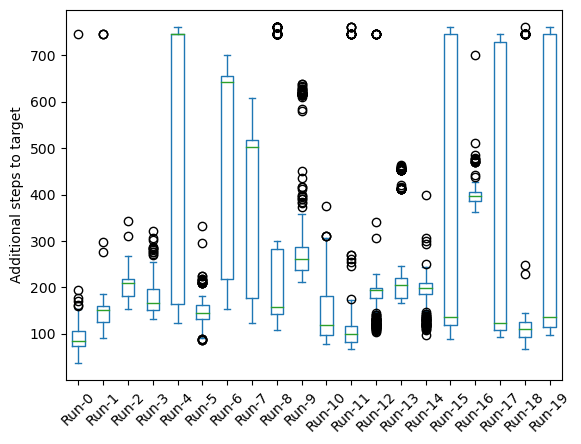

In [4]:
plot_extra_steps_from_file(ground_air_test_folder + 'extra_steps.csv')

Let's pick Run-2

In [5]:
# Retrieving the Simulations of a run
RUN_ID = 2
simulations_df = pd.read_csv(ground_air_test_folder + f'Simulations/run-{RUN_ID}-sims.csv', index_col=0)

In [6]:
value_function = ValueFunction.load_from_file(ground_air_test_folder + f'ValueFunctions/run-{RUN_ID}-VF.gzip', model)

In [7]:
groundair_all_sim_hist = []

for col in simulations_df.columns:
    sim_steps = simulations_df[col].tolist()
    sim_steps = [json.loads(step) for step in sim_steps if isinstance(step, str)]

    # Creation of simulation history
    sim_hist = SimulationHistory(model, sim_steps[0]['s'], Belief(model))

    sim_hist.states = [step['s'] for step in sim_steps] + [model.end_states[0]]
    sim_hist.actions = [step['a'] for step in sim_steps]
    sim_hist.observations = [step['o'] for step in sim_steps]
    sim_hist.rewards = [step['r'] for step in sim_steps]

    # Adding it to set
    groundair_all_sim_hist.append(sim_hist)

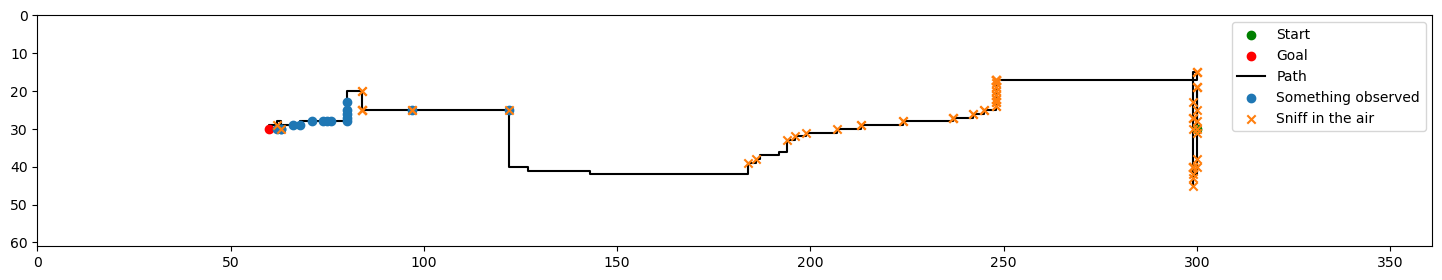

In [8]:
# Plotting a particular simulation
SIM_ID = 5

sim_hist = groundair_all_sim_hist[SIM_ID]

# Actual plot
plot_steps(sim_hist)

# Ground simulations

In [9]:
ground_test_folder = './Test_Ground_fsvi_300it_100exp_099g_1e-06eps_20run_300sim_20231127_185934/'

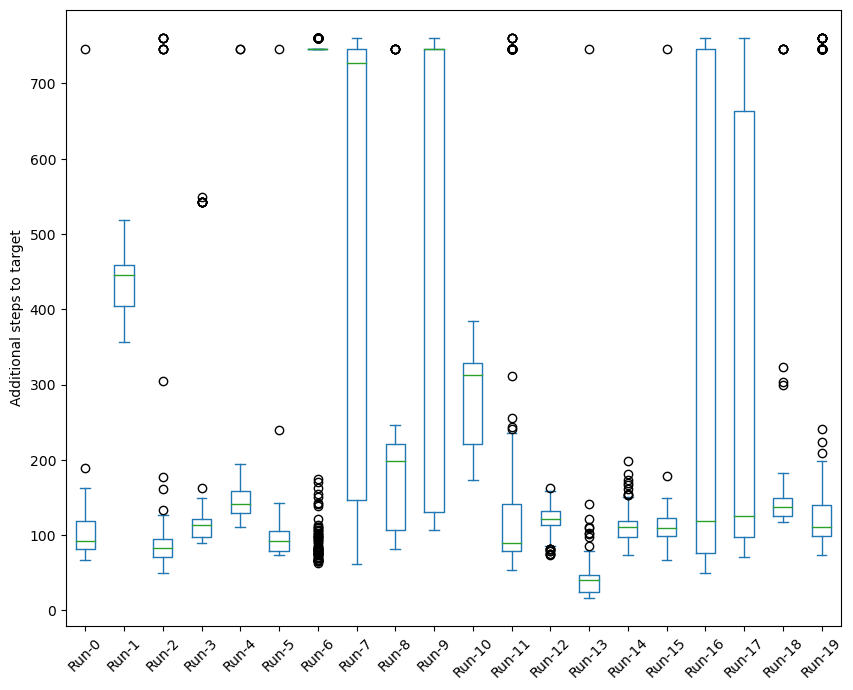

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
plot_extra_steps_from_file(ground_test_folder + 'extra_steps.csv', ax=ax)

In [13]:
# Retrieving the Simulations of a run
GROUND_RUN_ID = 10
ground_simulations_df = pd.read_csv(ground_air_test_folder + f'Simulations/run-{GROUND_RUN_ID}-sims.csv', index_col=0)

In [14]:
ground_all_sim_hist = []

for col in ground_simulations_df.columns:
    sim_steps = simulations_df[col].tolist()
    sim_steps = [json.loads(step) for step in sim_steps if isinstance(step, str)]

    # Creation of simulation history
    sim_hist = SimulationHistory(model, sim_steps[0]['s'], Belief(model))

    sim_hist.states = [step['s'] for step in sim_steps] + [model.end_states[0]]
    sim_hist.actions = [step['a'] for step in sim_steps]
    sim_hist.observations = [step['o'] for step in sim_steps]
    sim_hist.rewards = [step['r'] for step in sim_steps]

    # Adding it to set
    ground_all_sim_hist.append(sim_hist)

# Plot a)

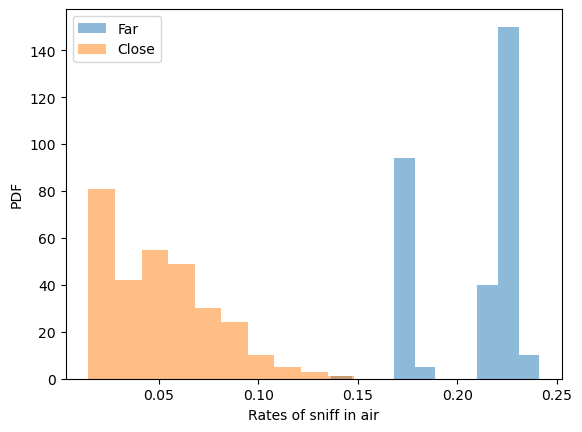

In [15]:
plot_distance_rates(model, groundair_all_sim_hist)

# Plot b)

In [16]:
ground_air_extra_steps = pd.read_csv(ground_air_test_folder + 'extra_steps.csv')
ground_extra_steps = pd.read_csv(ground_test_folder + 'extra_steps.csv')

if 'Average' in ground_air_extra_steps:
    ground_air_extra_steps.drop(columns='Average', inplace=True)

if 'Average' in ground_extra_steps:
    ground_extra_steps.drop(columns='Average', inplace=True)

In [17]:
ground_air_run_es = ground_air_extra_steps.to_numpy()[RUN_ID]
ground_run_es = ground_extra_steps.to_numpy()[GROUND_RUN_ID]

In [18]:
es_df = pd.DataFrame({'Ground and Air': ground_air_run_es, 'Ground only': ground_run_es})

<Axes: >

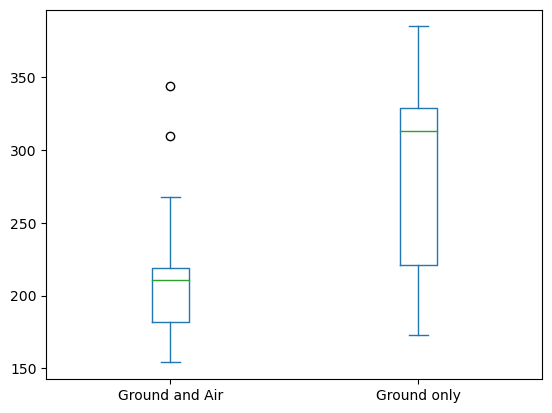

In [19]:
es_df.plot(kind='box')

# Plot c)

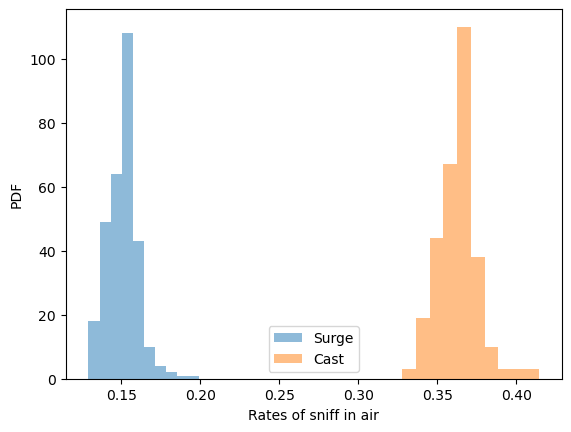

In [20]:
plot_cast_rates(groundair_all_sim_hist)

# Plot d)

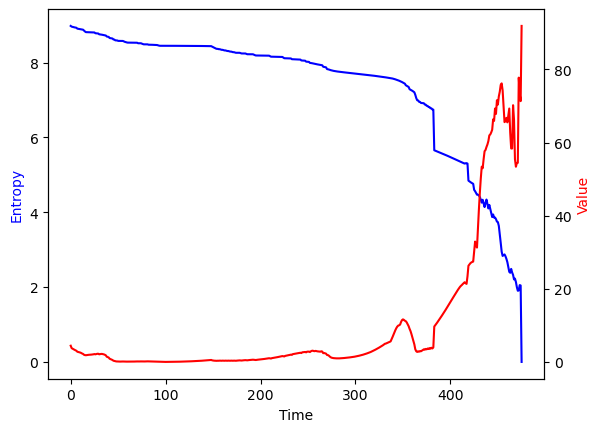

In [21]:
plot_entropy_value(groundair_all_sim_hist[0], value_function)

# Combining plots

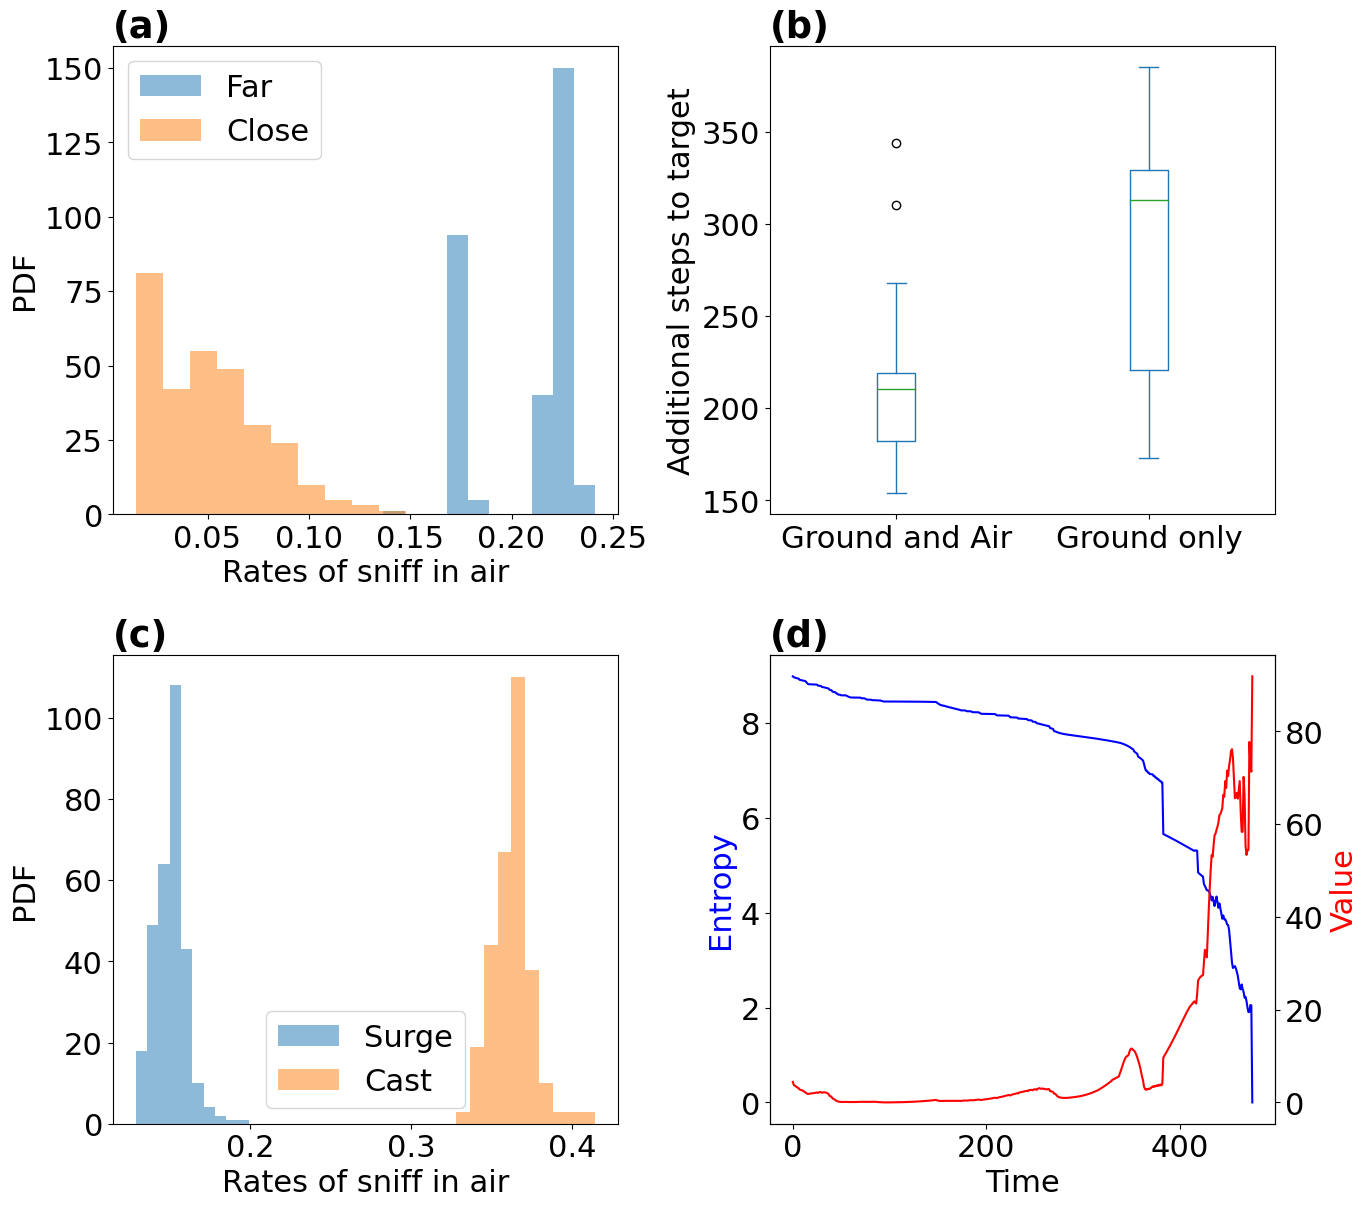

In [31]:
fig, ((ax_a, ax_b),(ax_c, ax_d)) = plt.subplots(2, 2, figsize=(15,14))
plt.rc('font', size=22)
plt.subplots_adjust(wspace=0.3,hspace=0.3)

# a)
ax_a.set_title('(a)', loc='left', fontweight="bold")
plot_distance_rates(model, groundair_all_sim_hist, ax=ax_a)

# b)
ax_b.set_title('(b)', loc='left', fontweight="bold")
es_df.plot(kind='box', ax=ax_b)
ax_b.set_ylabel('Additional steps to target')

# c)
ax_c.set_title('(c)', loc='left', fontweight="bold")
plot_cast_rates(groundair_all_sim_hist, ax=ax_c)

# d)
ax_d.set_title('(d)', loc='left', fontweight="bold")
plot_entropy_value(groundair_all_sim_hist[0], value_function, ax=ax_d)